# Introduction

This is a Jupyter notebook designed to introduce you to three things.  First of course is the idea of using a Jupyter notebook, but we'll mostly cover that by learning-by-doing.  Second, we'll cover the basics of using Python's standard data science libraries.  Third, we'll actually do some things with real data to see what kinds of analyses are possible.

# The data

There are lots of interesting data sets floating around the internet today.  I've downloaded one such set of data files on taxi-type services in New York City and have included them in the Docker image you are running.  These files were released in response to a freedom of information act request.  We're going to concentrate on just one file.

So first, where is this data and what does it look like?

We're going to use some python tricks that are useful in these interactive sessions.  I'm not sure exactly why or how this works, and I'm definitely "cargo cult" programming here, but apparently if you put an exclamation point in front of a command, you can run our friendly shell commands.  

For example, where are we?  We can use "pwd", or print working directory.


In [1]:
!pwd

/home/jovyan/work


So we're in the "work" directory of some account user name "jovyan".  Okay.  Now where is this data?  Try 'ls' to get a list of files and directories where we are.

In [2]:
!ls

Untitled.ipynb


Hmm, that does not look promising.  Maybe it is in the directory above us?  Remember "." means "the current directory" and ".." means "one directory up from where we are now", so let's try "ls ..".


In [3]:
!ls ..

data  work


Okay.  data and work.  What are those?  Perhaps we can try some flags, like "ls -lrt"

In [4]:
!ls -lrt ..

total 8
drwxr-sr-x 2 root   root  4096 Feb  3 16:58 data
drwxr-xr-x 3 jovyan users 4096 Feb  4 21:02 work


Yes that worked.  So of course the -l (for long) flag is all TMI with it's drwx... alphabet soup, but the first letter "d" for `data` and again for `work` means that these are both directories.  We know we were in `work` (see above and the pwd command), so let's see what is in `data`.  We'll use the -lrt flags for data because we want to know how big the files are before we go ahead and import them and possibly slow our computer to a crawl.

In [5]:
!ls -lrt ../data

total 854568
-rw-r--r-- 1 root root  47540750 Nov 14  2016 uber-raw-data-sep14.csv
-rw-r--r-- 1 root root  30174084 Nov 14  2016 uber-raw-data-may14.csv
-rw-r--r-- 1 root root  30695600 Nov 14  2016 uber-raw-data-jun14.csv
-rw-r--r-- 1 root root  36870544 Nov 14  2016 uber-raw-data-jul14.csv
-rw-r--r-- 1 root root 551672691 Nov 14  2016 uber-raw-data-janjune-15.csv
-rw-r--r-- 1 root root  38324585 Nov 14  2016 uber-raw-data-aug14.csv
-rw-r--r-- 1 root root  26110064 Nov 14  2016 uber-raw-data-apr14.csv
-rw-r--r-- 1 root root      9866 Nov 14  2016 Uber-Jan-Feb-FOIL.csv
-rw-r--r-- 1 root root  11584897 Nov 14  2016 other-Skyline_B00111.csv
-rw-r--r-- 1 root root  19036075 Nov 14  2016 other-Prestige_B01338.csv
-rw-r--r-- 1 root root   9654300 Nov 14  2016 other-Lyft_B02510.csv
-rw-r--r-- 1 root root   8074611 Nov 14  2016 other-Highclass_B01717.csv
-rw-r--r-- 1 root root   7964601 Nov 14  2016 other-Firstclass_B01536.csv
-rw-r--r-- 1 root root   1418035 Nov 14  2016 other-FHV-services_j

Open the doors, and there's all the people!  

There is one really big file in there called `uber-raw-data-janjune-15.csv`.  How big?  15 something something.  The numbers are not so "human readable" are they?  Let's add another flag to the `ls` command:  -h.  -h means "make the file size output human readable".  so:

In [6]:
ls -lrth ../data

total 835M
-rw-r--r-- 1 root root  46M Nov 14  2016 uber-raw-data-sep14.csv
-rw-r--r-- 1 root root  29M Nov 14  2016 uber-raw-data-may14.csv
-rw-r--r-- 1 root root  30M Nov 14  2016 uber-raw-data-jun14.csv
-rw-r--r-- 1 root root  36M Nov 14  2016 uber-raw-data-jul14.csv
-rw-r--r-- 1 root root 527M Nov 14  2016 uber-raw-data-janjune-15.csv
-rw-r--r-- 1 root root  37M Nov 14  2016 uber-raw-data-aug14.csv
-rw-r--r-- 1 root root  25M Nov 14  2016 uber-raw-data-apr14.csv
-rw-r--r-- 1 root root 9.7K Nov 14  2016 Uber-Jan-Feb-FOIL.csv
-rw-r--r-- 1 root root  12M Nov 14  2016 other-Skyline_B00111.csv
-rw-r--r-- 1 root root  19M Nov 14  2016 other-Prestige_B01338.csv
-rw-r--r-- 1 root root 9.3M Nov 14  2016 other-Lyft_B02510.csv
-rw-r--r-- 1 root root 7.8M Nov 14  2016 other-Highclass_B01717.csv
-rw-r--r-- 1 root root 7.6M Nov 14  2016 other-Firstclass_B01536.csv
-rw-r--r-- 1 root root 1.4M Nov 14  2016 other-FHV-services_jan-aug-2015.csv
-rw-r--r-- 1 root root  62K Nov 14  2016 other-Federal_0

So now we can see that most of the data files are in the "tens of megabytes" range, but that "big" file is 500 megabytes.  So big, but not even close to "big data" big.  Still, it will take more time to process than the smaller files, so let's avoid it.  For this exercise we'll use the June 2014 file.  Let's make a python variable with that fact.

In [7]:
path = '../data/uber-raw-data-jun14.csv'

Okay, now that we've picked a file, what is inside of it? For that we'll use another shell command called `head`.  `head` gives the first few lines of a file, ten by default, but you can change that with the `-n` flag.  It's counterpart is `tail`, which returns the *last* ten lines of a file.  Head is useful for looking at the tops of data files, where by convention the definition of the data is stored.  Tail is useful for looking at things like log files, where you are interested in seeing whether something is finished, what happened to cause a program to crash, and so on.  So let's call `head` on the path variable.  We can do that by using a "dollar sign interpolation" on the python variable `path`.  The dollar sign says to the command parser "don't actually use the word path.  Instead use the contents of the variable named `path`.

In [8]:
!head $path -n 5

"Date/Time","Lat","Lon","Base"
"6/1/2014 0:00:00",40.7293,-73.992,"B02512"
"6/1/2014 0:01:00",40.7131,-74.0097,"B02512"
"6/1/2014 0:04:00",40.3461,-74.661,"B02512"
"6/1/2014 0:04:00",40.7555,-73.9833,"B02512"


So there are lots of useful little tidbits here.  First off, the file name `uber-raw-data-jun14.csv` is a clue that this is a "comma separated value" file, or CSV.  And indeed, you can see that there are four columns, and each column is separated by a comma.  

Second, we can see the first row of data defines what is in each column, and then subsequent rows contain the data.  

Third, we can see that this file is reasonably well formatted (well, at least the first 5 lines look good).  CSV is a super common file format, but there are lots of tricky edge cases, and in a surprisingly high number of cases of data floating around in the wild, you'll find really ugly things like quotation marks that open but don't close, floating commas at the end of each line, and so on.  Here we see that the first column and last column both have open and close quotes; that each line ends *without* a dangling comma; that the header row has four items, and each data row has for items; and that the first column looks like a timestamp.  

Because I've done this way too much in my lifetime, I just spotted an error in the CSV file.  I'll give you a hint that it relates to the timestamp data.  Try to guess what it is, and I'll let you know a little later in this notebook.

So now we've identified the file we want and saved it in a variable called `path`, and we've looked at the file and see that it has time, lat (latitude), lon (longitude) and something called "Base" that means nothing to us right now.  In fact, I don't really care at all what "Base" is, because we're just going to look at time and space for this notebook.

How do we "read in" the data file into a Python variable? The first step is to import the most useful data processing libraries, as follows.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First comes pandas, then numpy, then matplotlib.  These libraries give you access to lots and lots of useful functions---functions that *you* don't have to write, and that perform common tasks.  For example, to read a data file, you can of course use straight python commands.  However, by using a library function to do this, the data is both imported and massaged into a useful form.

Next we want to import some data so that we can play around with it.  In this case, Let's pick one and load it into a pandas "data frame".  Note that here we are executing python code rather than sending shell commands out to the shell, so we *do not* want to dollar-sign interpolate the `path` variable.

In [10]:
data = pd.read_csv(path)

What just happened?  We have no output.  Did it work?  Let's just type `data` and see what happens.

In [11]:
data

,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512
5,6/1/2014 0:08:00,40.7152,-73.9917,B02512
6,6/1/2014 0:08:00,40.7282,-73.9910,B02512
7,6/1/2014 0:08:00,40.3042,-73.9794,B02512
8,6/1/2014 0:09:00,40.7270,-73.9915,B02512
9,6/1/2014 0:10:00,40.7221,-73.9965,B02512


Okay, cool.  Instead of seeing megabytes of data, the notebook interface is smart enough to show us only the beginning and ending of the data.  We have about 664,000 rows (rounding, of course) and the data run from midnight on the first of June, to midnight on the 30th of June, more or less.

So they say a picture is worth a thousand words (or in this case, over half a million words), so let's try to plot this data.  

The first thing we want to do is figure out whether the data import step (the `pd.read_csv` command) properly "decoded" the date-time strings into actual dates.  To check this you have to understand a few things.

First, the `pd.read_csv` command loaded the data into a pandas Data Frame.  You can read more about data frames [here](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe).

Second, data frames have lots of useful properties, including some built in types.  Pandas recognizes integers and decimals, and other things as well.  In order to see what data types pandas has deduced from the input data, type the command `data.dtypes`.

In [12]:
data.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

As you can see, the first column, called "Date/Time" has been saved as an "object".  What we want is to convince Pandas to see that it should be considered some sort of date time thingee.  According to the page on date time functions (see [here](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#converting-to-timestamps)), there is a function called `to_datetime` that takes a series as an input and outputs a list of datetime objects.  Let's try that with just the first few elements in the series by using the `head` function.

First, how does `head` work?  Just use the `head` function, as follows:

In [13]:
data.head()

,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512


Second, how do we see *just* the Date/Time column of data?  We can use the name of the column (in this case, "Date/Time") as follows:

In [14]:
data['Date/Time'].head()


0    6/1/2014 0:00:00
1    6/1/2014 0:01:00
2    6/1/2014 0:04:00
3    6/1/2014 0:04:00
4    6/1/2014 0:07:00
Name: Date/Time, dtype: object

Finally, apply the `to_datetime` function to just the first 5 lines of the `Date/Time` column to see what we get.

In [15]:
pd.to_datetime(data['Date/Time'].head())

0   2014-06-01 00:00:00
1   2014-06-01 00:01:00
2   2014-06-01 00:04:00
3   2014-06-01 00:04:00
4   2014-06-01 00:07:00
Name: Date/Time, dtype: datetime64[ns]

Okay, that worked just fine.  It is sometimes the case that the input times that look like times to a human are confusing to a computer.  For example, the above data is in "year-month-day" format.  Americans often put time in "month day year" format, while the European standard is to use a "day month year" format.  It's all terribly confusing to a poor program, so you can specify what you *mean* by using a `format` parameter that describes exactly what is where.  Details are given on [the `to_datetime` documentation page](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#converting-to-timestamps).

But actually, the read_csv function has lots of options, and one of them is to read in the data as a timestamp in the first place.  So we'll change our `data = pd.read_csv(path)` line from above to use these options.  This takes a bit more time that the earlier `read_csv` command, because now it has to actually process and interpret each of those 600,000 timestamps and turn them into a `datetime64` structure.

In [23]:
data = pd.read_csv(path, parse_dates=['Date/Time'],index_col='Date/Time')
data.head()

,Lat,Lon,Base
Date/Time,,,
2014-06-01 00:00:00,40.7293,-73.9920,B02512
2014-06-01 00:01:00,40.7131,-74.0097,B02512
2014-06-01 00:04:00,40.3461,-74.6610,B02512
2014-06-01 00:04:00,40.7555,-73.9833,B02512
2014-06-01 00:07:00,40.6880,-74.1831,B02512


Notice how now the 'Date/Time' column is in bold and seems more important than the other data items? That's because the other thing we added was to tell the CSV parser to use the 'Date/Time' column as an index.  Indexes are super useful, but explaining why is harder than just showing what they can do.  So let's just show how it can be used.



In [47]:
data['hour'] = data.index.hour
data['trips'] = 1 
counts = data.groupby('hour').aggregate(sum)['trips']
counts

hour
0     14514
1      9167
2      6189
3      6937
4      7701
5     11955
6     22030
7     30834
8     29771
9     24298
10    23584
11    24155
12    25233
13    28937
14    34428
15    41586
16    48162
17    50452
18    45013
19    38203
20    40108
21    40791
22    35614
23    24182
Name: trips, dtype: int64

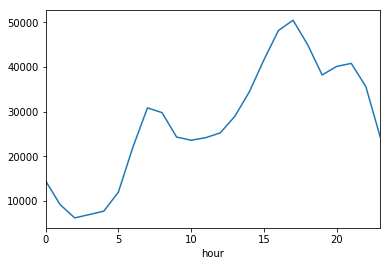

In [48]:
counts.plot()

Look up the documentation for the `group by` function <http://pandas.pydata.org/pandas-docs/stable/groupby.html> and see if you can figure out how to get the average number of trips per hour, by changing sum in the following line:

In [ ]:
average_counts = data.groupby('hour').aggregate(sum)['trips']
plot(average_counts)